In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [2]:
from google.colab import files
files = files.upload()

Saving haberman.csv to haberman (1).csv


In [3]:
df = pd.read_csv('haberman.csv')

In [4]:
df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [5]:
df.columns = ['Age', 'Op_year', 'Nodes', 'Status']

df.head()

,Age,Op_year,Nodes,Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [6]:
df.shape

(305, 4)

In [7]:
df.isnull().sum()

Age        0
Op_year    0
Nodes      0
Status     0
dtype: int64

In [8]:
df.describe()

,Age,Op_year,Nodes,Status
count,305.000000,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066,1.265574
std,10.744024,3.254078,7.199370,0.442364
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,61.000000,66.000000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


In [9]:
df['Status'].value_counts()

1    224
2     81
Name: Status, dtype: int64

In [10]:
#mapping the values by changing 2 to 0, 1 to 1.

df['Target'] = df['Status'].map({2: 0,1 : 1})

In [11]:
df.head()

,Age,Op_year,Nodes,Status,Target
0,30,62,3,1,1
1,30,65,0,1,1
2,31,59,2,1,1
3,31,65,4,1,1
4,33,58,10,1,1


In [12]:
df['Target'].value_counts()

1    224
0     81
Name: Target, dtype: int64

In [13]:
#Dropping Status column as we already have stored their values in Target column 
df.drop(['Status'], axis=1, inplace=True)

df.head(3)

,Age,Op_year,Nodes,Target
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1


Text(10.175000000000004, 0.5, 'Age')

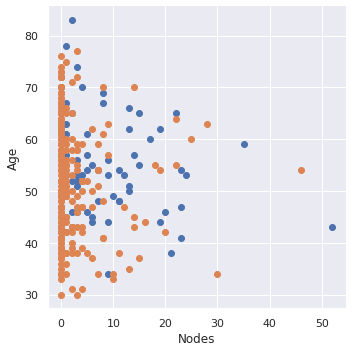

In [14]:
sns.FacetGrid(df, hue="Target", height=5).map(plt.scatter , 'Nodes','Age')
plt.xlabel('Nodes')
plt.ylabel('Age')

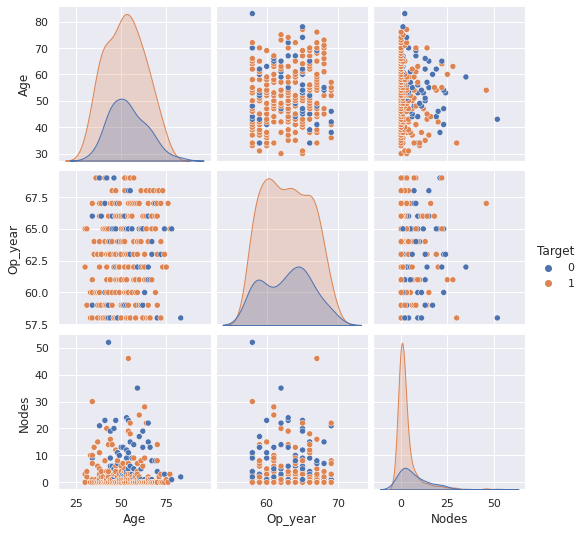

In [15]:
sns.set_style("darkgrid")
sns.pairplot(data=df,hue='Target')

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


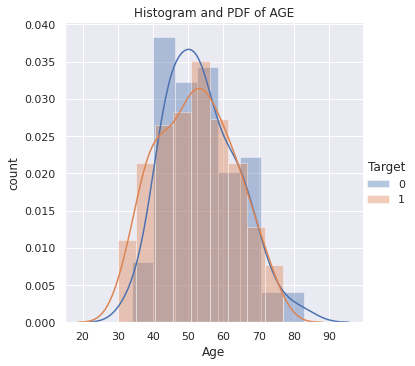

In [16]:
sns.FacetGrid(df, hue="Target", height=5) .map(sns.distplot, "Age").add_legend();
plt.title('Histogram and PDF of AGE')
plt.ylabel('count')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


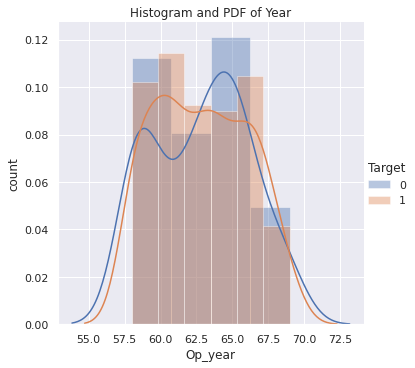

In [17]:
sns.FacetGrid(df, hue="Target", height=5).map(sns.distplot, "Op_year").add_legend();
plt.title('Histogram and PDF of Year')
plt.ylabel('count')
plt.show();

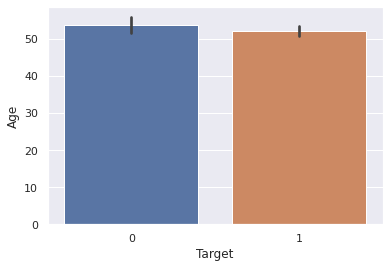

In [18]:
sns.barplot(x=df['Target'],y=df['Age'])

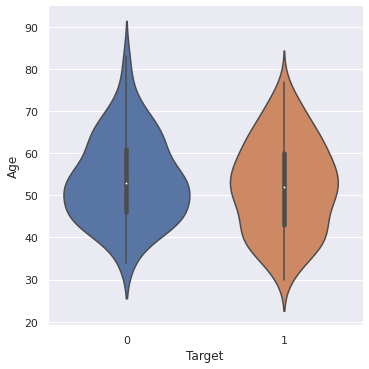

In [19]:
sns.catplot(x=df['Target'],y=df['Age'],kind='violin',data=df)

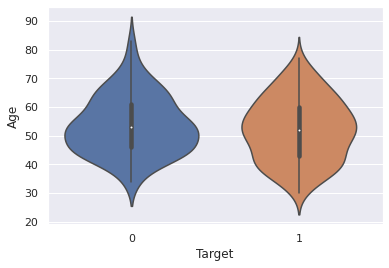

In [20]:
sns.violinplot(x=df['Target'],y=df['Age'],data=df)
plt.show()

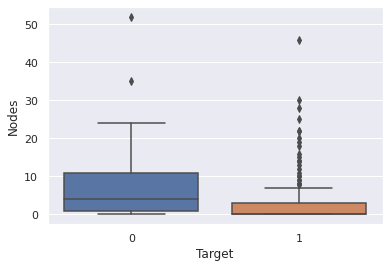

In [21]:
sns.boxplot(x='Target', y='Nodes', data=df)
plt.show()

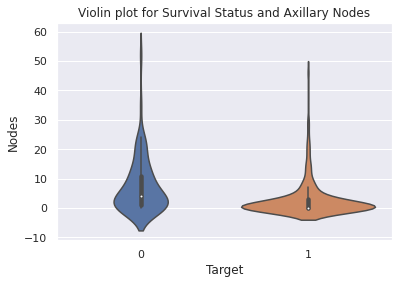

In [22]:
sns.violinplot(x='Target', y='Nodes', data=df)
plt.title("Violin plot for Survival Status and Axillary Nodes")
plt.show()

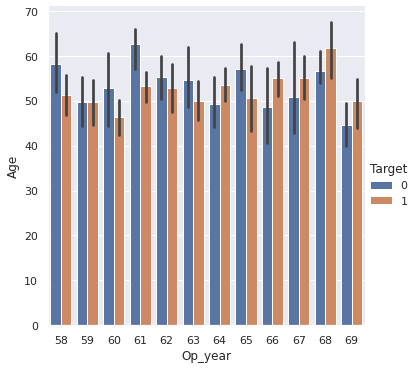

In [23]:
sns.catplot(x='Op_year',y='Age',kind='bar',hue='Target',data=df)

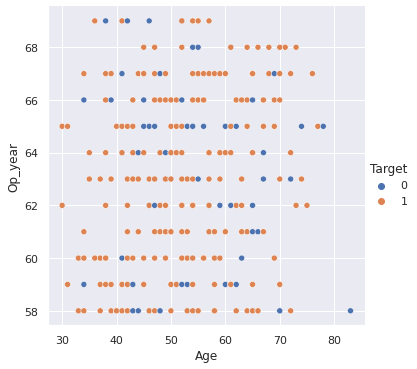

In [24]:
sns.relplot(x='Age',y='Op_year',hue='Target',data=df)

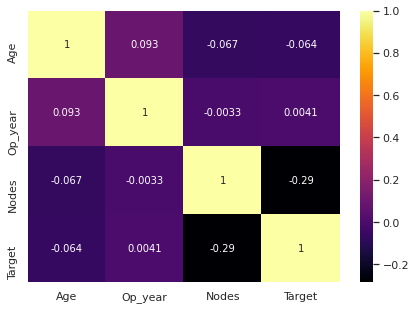

In [25]:
#Finding Co-relation

plt.figure(figsize=(7,5))
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.show()

In [26]:
df.columns

Index(['Age', 'Op_year', 'Nodes', 'Target'], dtype='object')

In [27]:
X = df.iloc[:,0:3].values
y = df.iloc[:,-1].values

**Splitting data into train,test,split**

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [30]:
print('X_train = ',X_train.shape)
print('X_test  = ',X_test.shape)
print('y_train = ',y_train.shape)
print('y_test  = ',y_test.shape)

X_train =  (213, 3)
X_test  =  (92, 3)
y_train =  (213,)
y_test  =  (92,)


**Preprocessing**

In [31]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

### ***KNN Classifier***

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [33]:
y_pred = knn.predict(X_test)

In [34]:
from sklearn import metrics

accuracy_knn = metrics.accuracy_score(y_test,y_pred)
print('Accuracy on test :',accuracy_knn)

Accuracy on test : 0.717391304347826


In [35]:
#calculating error for k values between 1 and 20

error = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))


In [37]:
error

[0.30434782608695654,
 0.40217391304347827,
 0.29347826086956524,
 0.33695652173913043,
 0.2826086956521739,
 0.2826086956521739,
 0.2717391304347826,
 0.2717391304347826,
 0.25,
 0.2391304347826087,
 0.2717391304347826,
 0.2717391304347826,
 0.2826086956521739,
 0.2608695652173913,
 0.2391304347826087,
 0.2391304347826087,
 0.2391304347826087,
 0.22826086956521738,
 0.2717391304347826]

Text(0, 0.5, 'ERROR RATE')

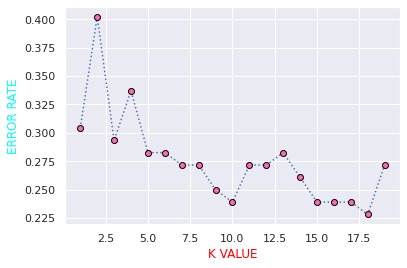

In [38]:
plt.figure(figsize=(6,4))
plt.plot(range(1,20),error,marker='o',mfc = 'hotpink',mec = 'black',linestyle = 'dotted')
plt.xlabel('K VALUE',c = 'red')
plt.ylabel('ERROR RATE', c = 'cyan')

We are going to specify k-neighbors to 18 as it less error rate to predict better accuracy 


In [58]:
knn1 = KNeighborsClassifier(n_neighbors=18)
knn1.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=18, p=2,
                     weights='uniform')

In [59]:
y_pred_knn = knn1.predict(X_test)

In [89]:
accuracy_knn1 = metrics.accuracy_score(y_test,y_pred_knn)
print('Accuracy after setting k-neighbors to 18 :',accuracy_knn1)

Accuracy after setting k-neighbors to 18 : 0.7717391304347826


In [61]:
from sklearn.metrics import classification_report,confusion_matrix

In [62]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.67      0.25      0.36        24
           1       0.78      0.96      0.86        68

    accuracy                           0.77        92
   macro avg       0.72      0.60      0.61        92
weighted avg       0.75      0.77      0.73        92



In [63]:
knn_cm = confusion_matrix(y_test,y_pred_knn)

In [64]:
knn_cm

array([[ 6, 18],
       [ 3, 65]])

Text(66.5, 0.5, 'True')

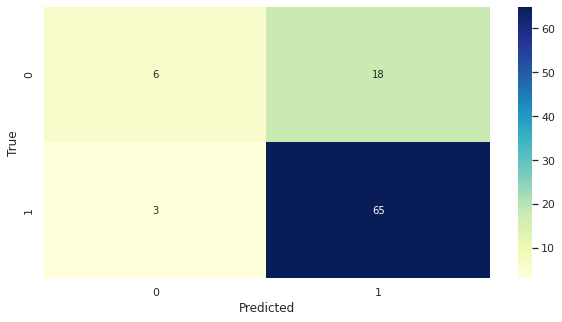

In [65]:
plt.figure(figsize=(10,5))
sns.heatmap(knn_cm,annot=True,cmap='YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('True')

### **Random Forest Classifier**

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rfc = RandomForestClassifier(criterion='gini')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [68]:
y_pred_rfc = rfc.predict(X_test)

In [69]:
accuracy_rfc = metrics.accuracy_score(y_test,y_pred_rfc)

In [70]:
accuracy_rfc

0.7391304347826086

In [71]:
print(classification_report(y_test,y_pred_rfc))

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        24
           1       0.81      0.84      0.83        68

    accuracy                           0.74        92
   macro avg       0.66      0.65      0.65        92
weighted avg       0.73      0.74      0.74        92



In [72]:
cmm = confusion_matrix(y_test,y_pred_rfc)

In [73]:
cmm

array([[11, 13],
       [11, 57]])

Text(66.5, 0.5, 'True')

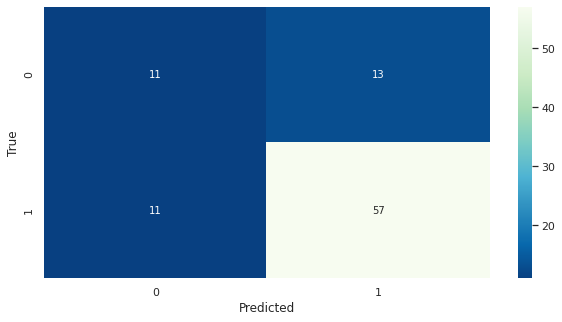

In [74]:
plt.figure(figsize=(10,5))
sns.heatmap(cmm,annot=True,cmap='GnBu_r')
plt.xlabel('Predicted')
plt.ylabel('True')

**Hyperparameter Tuning**

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:

#Number of trees in random_forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=1300,num=12)]
#Number of features to consider at every split
max_features = ['auto','sqrt']
#Maximim number of levels in tree
max_depth = [int(x) for x in np.linspace(start=5,stop=30,num=6)]
#Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]
#Minimum number of samples required at each leaf node
min_samples_leaf = [1,2,5,10]


In [77]:
random_grid = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf  
              }

print(random_grid)

{'n_estimators': [100, 209, 318, 427, 536, 645, 754, 863, 972, 1081, 1190, 1300], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [78]:
rfc1 = RandomForestClassifier()

In [79]:
rf_random = RandomizedSearchCV(estimator=rfc1,param_distributions=random_grid,n_iter=12,cv=25,verbose=2,random_state=42,n_jobs=1)

In [80]:
rf_random.fit(X_train,y_train)

Fitting 25 folds for each of 12 candidates, totalling 300 fits
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.3s remaining:    0.0s


[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.3s
[CV] n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10 
[CV]  n_estimators=972, min_samples_split=5, min_samples_leaf=5, max_features=sqrt, max_depth=10, total=   1.2s
[CV] n_estimators=972, min_samples_split=5, min_samp

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.5min finished


RandomizedSearchCV(cv=25, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
              

In [81]:
rf_random.best_params_

{'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 10,
 'min_samples_split': 15,
 'n_estimators': 1190}

In [82]:
predictions_cv = rf_random.predict(X_test)

In [83]:
accuracy_rfc_1 = metrics.accuracy_score(y_test,predictions_cv)

In [84]:
accuracy_rfc_1

0.717391304347826

Hyperparameter tuning for Random Forest, unable to predict better accuracy 

In [85]:
print(classification_report(y_test,predictions_cv))

              precision    recall  f1-score   support

           0       0.43      0.25      0.32        24
           1       0.77      0.88      0.82        68

    accuracy                           0.72        92
   macro avg       0.60      0.57      0.57        92
weighted avg       0.68      0.72      0.69        92



In [86]:
cm = confusion_matrix(y_test,predictions_cv)

In [87]:
cm

array([[ 6, 18],
       [ 8, 60]])

Text(66.5, 0.5, 'True')

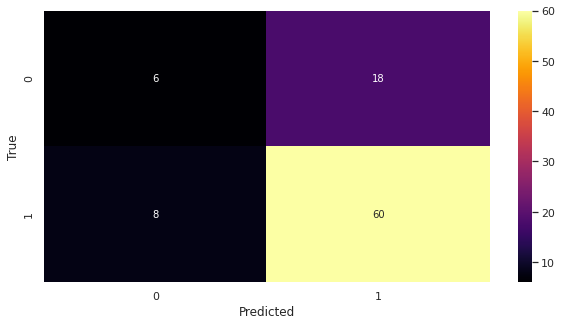

In [88]:
plt.figure(figsize=(10,5))
sns.heatmap(cm,annot=True,cmap='inferno')
plt.xlabel('Predicted')
plt.ylabel('True')